In [ ]:
!pip install plantcv

In [ ]:
!pip install plantcv

In [ ]:
import os

# Detectar el entorno del portátil
def detect_notebook_environment():
    if 'COLAB_GPU' in os.environ:
        print('Google Colaboratory detected.')
        %pip install "altair>=5" ipympl plantcv

        # Dar acceso y montar tu Google Drive
        from google.colab import drive
        drive.mount('/content/gdrive')

        # Habilitar la función de widget con matplotlib
        from google.colab import output
        output.enable_custom_widget_manager()

        #Ver directorio de trabajo, es posible que sea necesario cambiarlo
        %pwd
    else:
        print('Binder detected.')

environment = detect_notebook_environment()

In [ ]:
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Opciones de entrada/salida
args = WorkflowInputs(
    images=['/content/gdrive/MyDrive/Estudio independiente/Cacao_monilia1.jpeg'], #Modificar ruta
    names="image",
    result="Resultados_sunflowerTV.txt", #Modificar nombre
    outdir=".", # almacena
    writeimg=False,
    debug="plot"
)

In [ ]:
# Establecer depuración en el parámetro global
pcv.params.debug = args.debug
# Cambiar la configuración de pantalla
pcv.params.dpi = 100
pcv.params.text_size = 5
pcv.params.text_thickness = 20

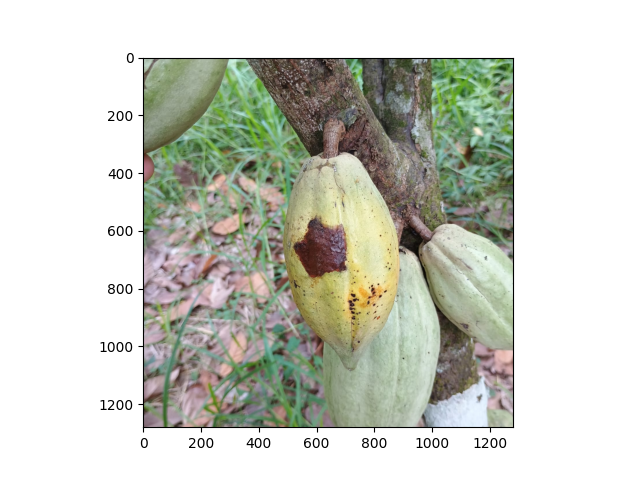

In [ ]:
img, path, filename = pcv.readimage(filename=args.image, mode='native')

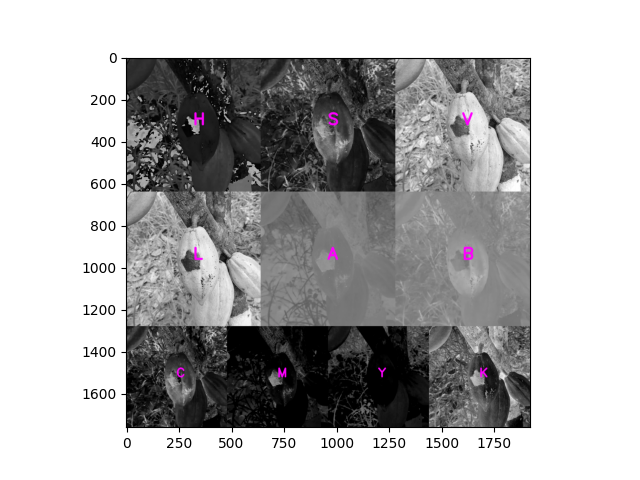

In [ ]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

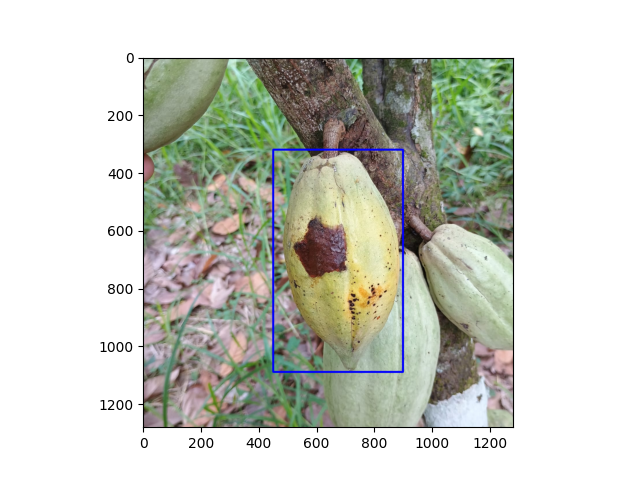

In [ ]:
crop_img = pcv.crop(img=img, x=450, y=320, h=770, w=450)

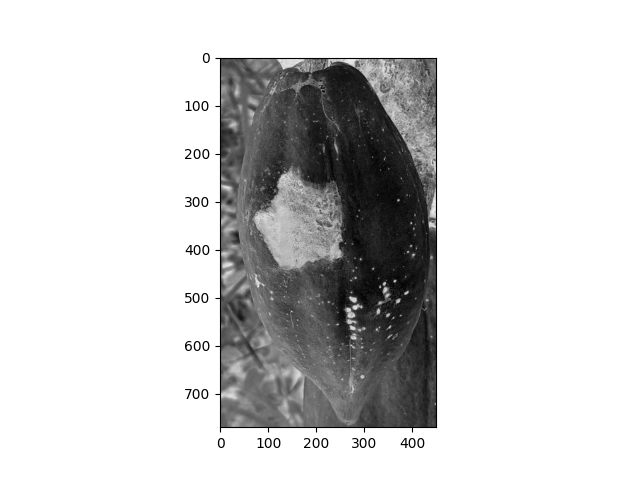

In [ ]:
A = pcv.rgb2gray_cmyk (rgb_img=crop_img, channel='k')

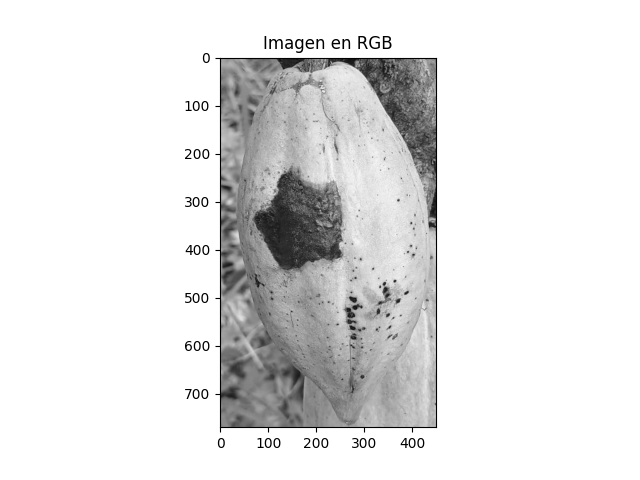

In [ ]:
import matplotlib.pyplot as plt

# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen
plt.imshow(img_gray, cmap='gray')
plt.show()

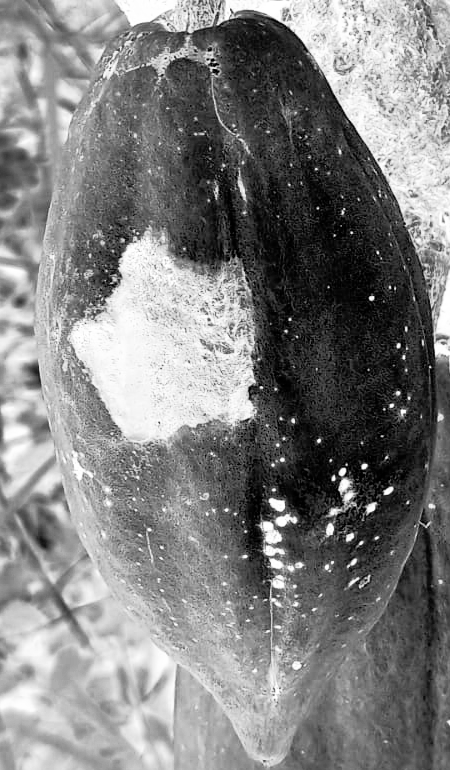

In [ ]:
# Ecualizar la imagen
img_equalizada = cv2.equalizeHist(A)
cv2_imshow(img_equalizada)

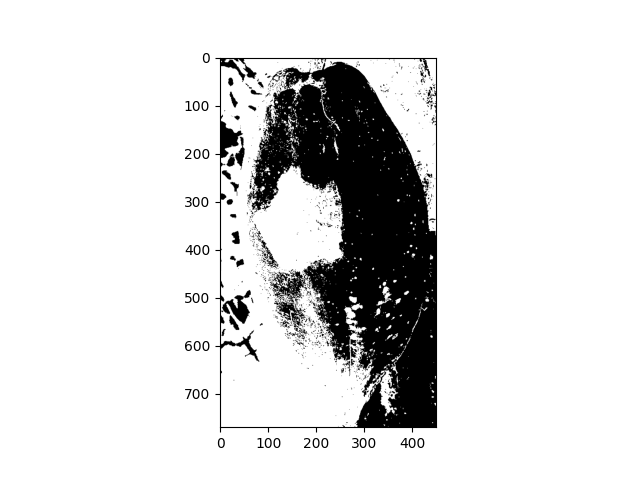

In [ ]:
threshold_dark = pcv.threshold.otsu(gray_img=img_equalizada,object_type='light')

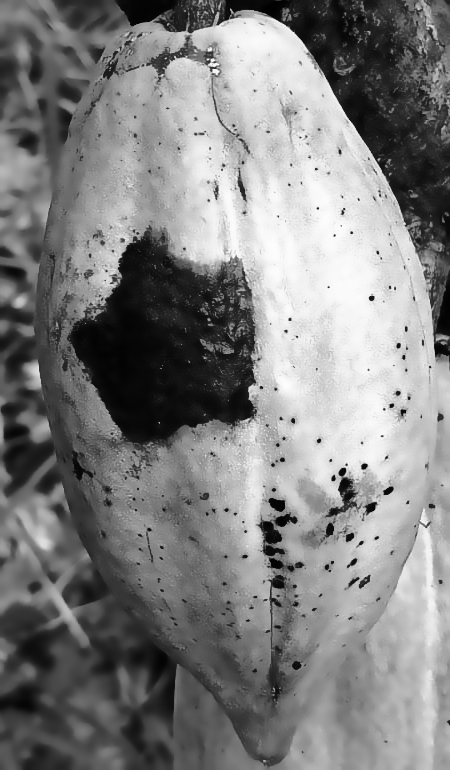

In [ ]:
img_suavizada = cv2.bilateralFilter(img_equalizada, 11,12*2,16/2)
cv2_imshow(img_suavizada)

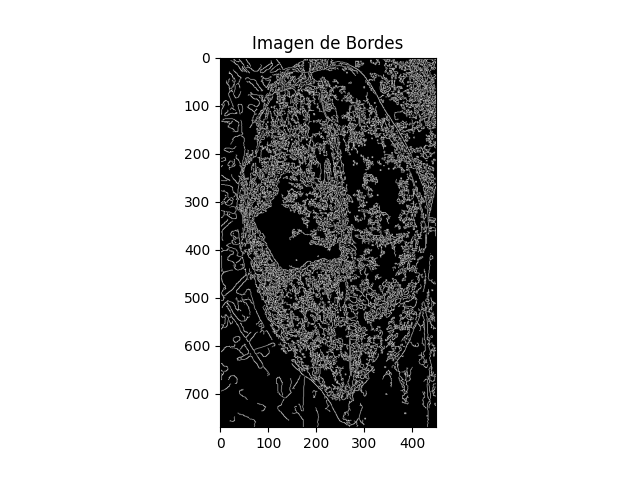

In [ ]:
# Crear una imagen de los bordes de la planta
img_bordes = cv2.Canny(img_suavizada, 0, 100)
plt.imshow(img_bordes, cmap='gray')
plt.title('Imagen de Bordes')
plt.show()

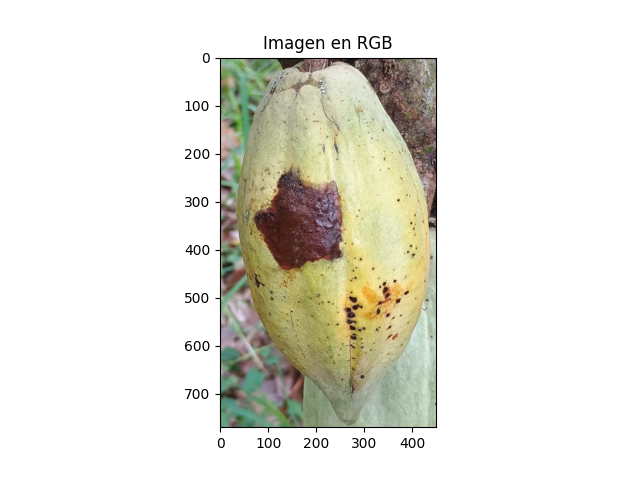

In [ ]:
# Convertir la imagen a espacio de color HSV
rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

# Muestra la imagen
plt.imshow(rgb)
plt.title('Imagen en RGB')
plt.show()